<center>
<h2>Bloch Sphere</h2>
</center>
<p>
<b>Next:</b> Tap into the code that converts an xyz vector to a state.
See if it looks the same when I plot that state on the sphere.

In [1]:
%autosave 0
%matplotlib inline
import numpy as np

Autosave disabled


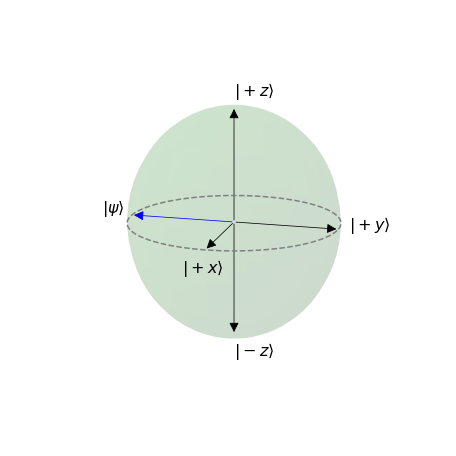

In [2]:
#
# Draw a sphere of radius R and return the associated pyplot object
#
def draw_vec(ax, v, color='black', label=None, fudge=1.1, **args):
    from sglib import Arrow3D

    V = Arrow3D(
        [0,float(v[0])],[0,float(v[1])],[0,float(v[2])],
        mutation_scale=20, lw=.75, arrowstyle="-|>", color=color, **args)
    ax.add_artist(V)
    ax.text3D(
        v[0]*fudge, v[1]*fudge, v[2]*fudge,
        label, color='black', fontsize='16')
    
def draw_sphere(R=1, color='yellow', npts=30, plt=None, ax=None,
    elev=15, azim=15):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from numpy import linspace, sin, cos, pi, outer, ones, size
    from matplotlib import cm
    
    # Set up the basic 3d plot
    fig = plt.figure(figsize=[8,8])
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect("equal")
    ax.set_axis_off()
    ax.view_init(elev=elev, azim=azim)
    
    # Draw the sphere
    u = linspace(0, 2 * pi, npts)
    v = linspace(0, pi, npts)
    x = R*outer(cos(u), sin(v))
    y = R*outer(sin(u), sin(v))
    z = R*outer(ones(size(u)), cos(v))
    ax.plot_surface(
        x, y, z,  rstride=1, cstride=1, color=color, alpha = 0.1,
        linewidth = 0)

    # Draw the axes
    c = 'black'
    draw_vec(ax, [1,0,0], color=c, label=r'$|+x\rangle$', fudge=1.75)
    draw_vec(ax, [0,1,0], color=c, label=r'$|+y\rangle$')
    draw_vec(ax, [0,0,1], color=c, label=r'$|+z\rangle$')
    draw_vec(ax, [0,0,-1], color=c, label=r'$|-z\rangle$', fudge=1.2)

    # Draw a dashed line around the "equator."
    N=100
    x = []; y = []; z = []
    sin_theta = sin(pi/2)
    cos_theta = cos(pi/2)
    phi = pi/2
    for n in range(N+1):
        x += [ R*sin_theta*cos(phi), ]
        y += [ R*sin_theta*sin(phi), ]
        z += [ R*cos_theta, ]
        phi += 2*pi/N
    ax.plot(x, y, z, color='gray', linestyle='--')
    return plt, ax

# Plot the state psi on a bloch sphere
def plot_state(ax, psi, clr='blue'):
    from numpy import sin, cos, arccos, abs, angle
    def sign(x):
        if x < 0: return('-')
        else: return('+')
    alpha = complex(psi[0]); beta = complex(psi[1])
    a_str = '%.3f %s %.3fi'\
        %(alpha.real,sign(alpha.imag),abs(alpha.imag))
    b_str  = '%.3f %s %.3fi'\
        %(beta.real,sign(beta.imag),abs(beta.imag))
    psi_str = r'$|\psi\rangle=(%s)|0\rangle+(%s)|1\rangle$'%(a_str,b_str)
    theta = 2*arccos(abs(alpha))
    phi = angle(beta)-angle(alpha)
    Print(r'$%s$'%psi_str)
    Print(r'$\theta=%s, \phi=%s$'%(theta,phi))
    x = cos(phi)*sin(theta)
    y = sin(phi)*sin(theta)
    z = cos(theta)
    draw_vec(ax, [x,y,z], color=clr, label=r'$|\psi\rangle$', fudge=1.3)
    #ax.set_title(r'Bloch Sphere for state %s'%psi_str, fontsize=16)

# Create a blank sphere
plt, ax = draw_sphere(color='green', elev=15, azim=15)
#ax.set_title(r'Bloch Sphere for state $|\psi\rangle$', fontsize=16)
from sglib import Print, col
sqrt = np.sqrt
psi = col(1,0) # +z
psi = col(0,1) # -z
psi = col(1,1)/sqrt(2)  # +x
psi = col(1,-1)/sqrt(2) # -x
psi = col(1,1j)/sqrt(2)  # +y
psi = col(1,-1j)/sqrt(2) # -y
plot_state(ax, psi)

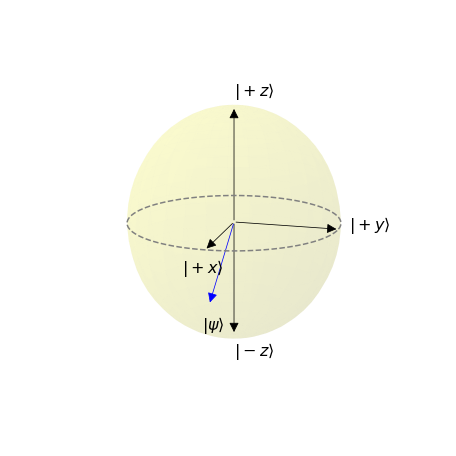

In [6]:
#
import one_bit_visualizations
# reload(one_bit_visualizations)
from one_bit_visualizations import spin_vector_to_state
from sympy import Rational, sqrt, latex as L
from qmlib2 import pZ, mZ
#spin = (1/sqrt(2), 0, 1/sqrt(2))
#spin = (1, 0, 0)
#spin = (0, -1, 0)
#spin = (0, 1/sqrt(2), 1/sqrt(2))
#spin = (1/sqrt(3), 1/sqrt(3), -1/sqrt(3))
#spin, state, mstate = spin_vector_to_state(spin)
#Print('For the spin vector $%s$'%L(spin), font_size=3)
state = Rational(1,2)*pZ + sqrt(3)/2*mZ
Print('the state is $%s$'%L(state), font_size=3)
plt, ax = draw_sphere(color='yellow', elev=15, azim=15)
plot_state(ax, state)